In [17]:
#Q2-part1: Did a single player score most of the winning team’s goals throughout the tournament Vs non-wining team?

In [63]:
import pandas as pd
import numpy as np

In [64]:
tournament_data= pd.read_csv('tournaments.csv')
goals_data= pd.read_csv('goals.csv')

In [65]:

#tournament_data.loc[ tournament_data['winner']== "West Germany", 'winner' ] = 'Germany'
tournament_data

key_id tournament_id      tournament_name  year  start_date    end_date  \
0        1       WC-1930  1930 FIFA World Cup  1930  1930-07-13  1930-07-30   
1        2       WC-1934  1934 FIFA World Cup  1934  1934-05-27  1934-06-10   
2        3       WC-1938  1938 FIFA World Cup  1938  1938-06-04  1938-06-19   
3        4       WC-1950  1950 FIFA World Cup  1950  1950-06-24  1950-07-16   
4        5       WC-1954  1954 FIFA World Cup  1954  1954-06-16  1954-07-04   
5        6       WC-1958  1958 FIFA World Cup  1958  1958-06-08  1958-06-29   
6        7       WC-1962  1962 FIFA World Cup  1962  1962-05-30  1962-07-17   
7        8       WC-1966  1966 FIFA World Cup  1966  1966-07-11  1966-07-30   
8        9       WC-1970  1970 FIFA World Cup  1970  1970-05-31  1970-06-21   
9       10       WC-1974  1974 FIFA World Cup  1974  1974-06-13  1974-07-07   
10      11       WC-1978  1978 FIFA World Cup  1978  1978-06-01  1978-06-25   
11      12       WC-1982  1982 FIFA World Cup  1982  1982-06-13  1982-07-11   
12      13       WC-1986  1986 FIFA World Cup  1986  1986-05-31  1986-06-29   
13      14       WC-1990  1990 FIFA World Cup  1990  1990-06-08  1990-07-08   
14      15       WC-1994  1994 FIFA World Cup  1994  1994-06-17  1994-07-17   
15      16       WC-1998  1998 FIFA World Cup  1998  1998-06-10  1998-07-12   
16      17       WC-2002  2002 FIFA World Cup  2002  2002-05-31  2002-06-30   
17      18       WC-2006  2006 FIFA World Cup  2006  2006-06-09  2006-07-09   
18      19       WC-2010  2010 FIFA World Cup  2010  2010-06-11  2010-07-11   
19      20       WC-2014  2014 FIFA World Cup  2014  2014-06-12  2014-07-13   
20      21       WC-2018  2018 FIFA World Cup  2018  2018-06-14  2018-07-15   

     host_country        winner  host_won  count_teams  group_stage  \
0         Uruguay       Uruguay         1           13            1   
1           Italy         Italy         1           16            0   
2          France         Italy         0           15            0   
3          Brazil       Uruguay         0           13            1   
4     Switzerland  West Germany         0           16            1   
5          Sweden        Brazil         0           16            1   
6           Chile        Brazil         0           16            1   
7         England       England         1           16            1   
8          Mexico        Brazil         0           16            1   
9    West Germany  West Germany         1           16            1   
10      Argentina     Argentina         1           16            1   
11          Spain         Italy         0           24            1   
12         Mexico     Argentina         0           24            1   
13          Italy  West Germany         0           24            1   
14  United States        Brazil         0           24            1   
15         France        France         1           32            1   
16   Korea, Japan        Brazil         0           32            1   
17        Germany         Italy         0           32            1   
18   South Africa         Spain         0           32            1   
19         Brazil       Germany         0           32            1   
20         Russia        France         0           32            1   

    second_group_stage  final_round  round_of_16  quarter_finals  semi_finals  \
0                    0            0            0               0            1   
1                    0            0            1               1            1   
2                    0            0            1               1            1   
3                    0            1            0               0            0   
4                    0            0            0               1            1   
5                    0            0            0               1            1   
6                    0            0            0               1            1   
7                    0            0            0      

In [66]:

tournament_data=tournament_data.rename(columns={'winner': 'team_name'})
tournament_data.head()

key_id tournament_id      tournament_name  year  start_date    end_date  \
0       1       WC-1930  1930 FIFA World Cup  1930  1930-07-13  1930-07-30   
1       2       WC-1934  1934 FIFA World Cup  1934  1934-05-27  1934-06-10   
2       3       WC-1938  1938 FIFA World Cup  1938  1938-06-04  1938-06-19   
3       4       WC-1950  1950 FIFA World Cup  1950  1950-06-24  1950-07-16   
4       5       WC-1954  1954 FIFA World Cup  1954  1954-06-16  1954-07-04   

  host_country     team_name  host_won  count_teams  group_stage  \
0      Uruguay       Uruguay         1           13            1   
1        Italy         Italy         1           16            0   
2       France         Italy         0           15            0   
3       Brazil       Uruguay         0           13            1   
4  Switzerland  West Germany         0           16            1   

   second_group_stage  final_round  round_of_16  quarter_finals  semi_finals  \
0                   0            0            0               0            1   
1                   0            0            1               1            1   
2                   0            0            1               1            1   
3                   0            1            0               0            0   
4                   0            0            0               1            1   

   third_place_match  final  
0                  0      1  
1                  1      1  
2                  1      1  
3                  0      0  
4                  1      1

In [67]:
goals_data

key_id goal_id tournament_id      tournament_name   match_id  \
0          1  G-0001       WC-1930  1930 FIFA World Cup  M-1930-01   
1          2  G-0002       WC-1930  1930 FIFA World Cup  M-1930-01   
2          3  G-0003       WC-1930  1930 FIFA World Cup  M-1930-01   
3          4  G-0004       WC-1930  1930 FIFA World Cup  M-1930-01   
4          5  G-0005       WC-1930  1930 FIFA World Cup  M-1930-01   
5          6  G-0006       WC-1930  1930 FIFA World Cup  M-1930-02   
6          7  G-0007       WC-1930  1930 FIFA World Cup  M-1930-02   
7          8  G-0008       WC-1930  1930 FIFA World Cup  M-1930-02   
8          9  G-0009       WC-1930  1930 FIFA World Cup  M-1930-03   
9         10  G-0010       WC-1930  1930 FIFA World Cup  M-1930-03   
10        11  G-0011       WC-1930  1930 FIFA World Cup  M-1930-03   
11        12  G-0012       WC-1930  1930 FIFA World Cup  M-1930-04   
12        13  G-0013       WC-1930  1930 FIFA World Cup  M-1930-04   
13        14  G-0014       WC-1930  1930 FIFA World Cup  M-1930-04   
14        15  G-0015       WC-1930  1930 FIFA World Cup  M-1930-04   
15        16  G-0016       WC-1930  1930 FIFA World Cup  M-1930-05   
16        17  G-0017       WC-1930  1930 FIFA World Cup  M-1930-06   
17        18  G-0018       WC-1930  1930 FIFA World Cup  M-1930-06   
18        19  G-0019       WC-1930  1930 FIFA World Cup  M-1930-06   
19        20  G-0020       WC-1930  1930 FIFA World Cup  M-1930-07   
20        21  G-0021       WC-1930  1930 FIFA World Cup  M-1930-07   
21        22  G-0022       WC-1930  1930 FIFA World Cup  M-1930-07   
22        23  G-0023       WC-1930  1930 FIFA World Cup  M-1930-07   
23        24  G-0024       WC-1930  1930 FIFA World Cup  M-1930-08   
24        25  G-0025       WC-1930  1930 FIFA World Cup  M-1930-08   
25        26  G-0026       WC-1930  1930 FIFA World Cup  M-1930-08   
26        27  G-0027       WC-1930  1930 FIFA World Cup  M-1930-09   
27        28  G-0028       WC-1930  1930 FIFA World Cup  M-1930-10   
28        29  G-0029       WC-1930  1930 FIFA World Cup  M-1930-11   
29        30  G-0030       WC-1930  1930 FIFA World Cup  M-1930-11   
30        31  G-0031       WC-1930  1930 FIFA World Cup  M-1930-11   
31        32  G-0032       WC-1930  1930 FIFA World Cup  M-1930-11   
32        33  G-0033       WC-1930  1930 FIFA World Cup  M-1930-11   
33        34  G-0034       WC-1930  1930 FIFA World Cup  M-1930-11   
34        35  G-0035       WC-1930  1930 FIFA World Cup  M-1930-11   
35        36  G-0036       WC-1930  1930 FIFA World Cup  M-1930-11   
36        37  G-0037       WC-1930  1930 FIFA World Cup  M-1930-11   
37        38  G-0038       WC-1930  1930 FIFA World Cup  M-1930-12   
38        39  G-0039       WC-1930  1930 FIFA World Cup  M-1930-12   
39        40  G-0040       WC-1930  1930 FIFA World Cup  M-1930-12   
40        41  G-0041       WC-1930  1930 FIFA World Cup  M-1930-12   
41        42  G-0042       WC-1930  1930 FIFA World Cup  M-1930-13   
42        43  G-0043       WC-1930  1930 FIFA World Cup  M-1930-14   
43        44  G-0044       WC-1930  1930 FIFA World Cup  M-1930-14   
44        45  G-0045       WC-1930  1930 FIFA World Cup  M-1930-14   
45        46  G-0046       WC-1930  1930 FIFA World Cup  M-1930-14   
46        47  G-0047       WC-1930  1930 FIFA World Cup  M-1930-15   
47        48  G-0048       WC-1930  1930 FIFA World Cup  M-1930-15   
48        49  G-0049       WC-1930  1930 FIFA World Cup  M-1930-15   
49        50  G-0050       WC-1930  1930 FIFA World Cup  M-1930-15   
50        51  G-0051       WC-1930  1930 FIFA World Cup  M-1930-16   
51        52  G-0052       WC-1930  1930 FIFA World Cup  M-1930-16   
52        53  G-0053       WC-1930  1930 FIFA World Cup  M-1930-16   
53        54  G-0054       WC-1930  1930 FIFA World Cup  M-1930-16   
54        55  G-0055       WC-1930  1930 FIFA World Cup  M-1930-16   
55        56  G-0056       WC-1930  1930 FIFA World Cup  M-1930-16   
56        57  G-

In [68]:

goals_data=goals_data[['tournament_id', 'player_id', 'team_name', 'minute_regulation']]
single_player_goals=goals_data.groupby(['tournament_id', 'player_id', 'team_name']).count()['minute_regulation'].reset_index()
single_player_goals=single_player_goals.rename(columns={'minute_regulation': 'number_of_goals'})
single_player_goals.head(50)


tournament_id player_id       team_name  number_of_goals
0        WC-1930   P-00275         Uruguay                2
1        WC-1930   P-00290       Argentina                1
2        WC-1930   P-00296      Yugoslavia                1
3        WC-1930   P-00319      Yugoslavia                1
4        WC-1930   P-00455       Argentina                2
5        WC-1930   P-00521            Peru                1
6        WC-1930   P-00724         Uruguay                5
7        WC-1930   P-00826         Uruguay                2
8        WC-1930   P-00978         Romania                1
9        WC-1930   P-02034         Romania                1
10       WC-1930   P-02775         Uruguay                1
11       WC-1930   P-03789       Argentina                2
12       WC-1930   P-03816       Argentina                3
13       WC-1930   P-03855          Brazil                3
14       WC-1930   P-03952          Mexico                1
15       WC-1930   P-03988       Argentina                1
16       WC-1930   P-03989      Yugoslavia                2
17       WC-1930   P-04102         Romania                1
18       WC-1930   P-04216           Chile                2
19       WC-1930   P-04418       Argentina                8
20       WC-1930   P-04578          Brazil                2
21       WC-1930   P-04652           Chile                1
22       WC-1930   P-04652          Mexico                2
23       WC-1930   P-04702           Chile                2
24       WC-1930   P-04746          Mexico                1
25       WC-1930   P-05670          France                1
26       WC-1930   P-05896   United States                1
27       WC-1930   P-05989         Uruguay                2
28       WC-1930   P-06416       Argentina                1
29       WC-1930   P-06435      Yugoslavia                3
30       WC-1930   P-06672   United States                1
31       WC-1930   P-06978        Paraguay                1
32       WC-1930   P-07295          France                2
33       WC-1930   P-08997         Uruguay                3
34       WC-1930   P-09215   United States                4
35       WC-1930   P-09831          France                1
36       WC-1930   P-09935   United States                1
37       WC-1934   P-00692          France                1
38       WC-1934   P-00804         Belgium                2
39       WC-1934   P-00993         Austria                1
40       WC-1934   P-01139   United States                1
41       WC-1934   P-01191          Sweden                1
42       WC-1934   P-01236          Sweden                1
43       WC-1934   P-01289          France                1
44       WC-1934   P-01717     Netherlands                1
45       WC-1934   P-01808         Germany                1
46       WC-1934   P-02061  Czechoslovakia                2
47       WC-1934   P-02250           Italy                4
48       WC-1934   P-02366         Hungary                1
49       WC-1934   P-02668           Spain                1

In [69]:
#single_player_goals.sort_values(['tournament_id','team_name'] )
total_team_goals=goals_data.groupby(['tournament_id','team_name']).agg({'minute_regulation' : 'count'})
#total_team_goals

In [70]:
single_player_goals=single_player_goals.merge(total_team_goals, on=['tournament_id','team_name' ], how= 'left')
single_player_goals=single_player_goals.rename(columns={'minute_regulation': 'total_team_goals'})
single_player_goals

tournament_id player_id               team_name  number_of_goals  \
0          WC-1930   P-00275                 Uruguay                2   
1          WC-1930   P-00290               Argentina                1   
2          WC-1930   P-00296              Yugoslavia                1   
3          WC-1930   P-00319              Yugoslavia                1   
4          WC-1930   P-00455               Argentina                2   
5          WC-1930   P-00521                    Peru                1   
6          WC-1930   P-00724                 Uruguay                5   
7          WC-1930   P-00826                 Uruguay                2   
8          WC-1930   P-00978                 Romania                1   
9          WC-1930   P-02034                 Romania                1   
10         WC-1930   P-02775                 Uruguay                1   
11         WC-1930   P-03789               Argentina                2   
12         WC-1930   P-03816               Argentina                3   
13         WC-1930   P-03855                  Brazil                3   
14         WC-1930   P-03952                  Mexico                1   
15         WC-1930   P-03988               Argentina                1   
16         WC-1930   P-03989              Yugoslavia                2   
17         WC-1930   P-04102                 Romania                1   
18         WC-1930   P-04216                   Chile                2   
19         WC-1930   P-04418               Argentina                8   
20         WC-1930   P-04578                  Brazil                2   
21         WC-1930   P-04652                   Chile                1   
22         WC-1930   P-04652                  Mexico                2   
23         WC-1930   P-04702                   Chile                2   
24         WC-1930   P-04746                  Mexico                1   
25         WC-1930   P-05670                  France                1   
26         WC-1930   P-05896           United States                1   
27         WC-1930   P-05989                 Uruguay                2   
28         WC-1930   P-06416               Argentina                1   
29         WC-1930   P-06435              Yugoslavia                3   
30         WC-1930   P-06672           United States                1   
31         WC-1930   P-06978                Paraguay                1   
32         WC-1930   P-07295                  France                2   
33         WC-1930   P-08997                 Uruguay                3   
34         WC-1930   P-09215           United States                4   
35         WC-1930   P-09831                  France                1   
36         WC-1930   P-09935           United States                1   
37         WC-1934   P-00692                  France                1   
38         WC-1934   P-00804                 Belgium                2   
39         WC-1934   P-00993                 Austria                1   
40         WC-1934   P-01139           United States                1   
41         WC-1934   P-01191                  Sweden                1   
42         WC-1934   P-01236                  Sweden                1   
43         WC-1934   P-01289                  France                1   
44         WC-1934   P-01717             Netherlands                1   
45         WC-1934   P-01808                 Germany                1   
46         WC-1934   P-02061          Czechoslovakia                2   
47         WC-1934   P-02250                   Italy                4   
48         WC-1934   P-02366                 Hungary                1   
49         WC-1934   P-02668                   Spain                1   
50         WC-1934   P-02890          Czechoslovakia                1   
51         WC-1934   P-03023                  Brazil                1   
52         WC-1934   P-03198                   Spain                1   
53         WC-1934   P-03565                 Austria           

In [71]:
winning_team_single_player_goals=pd.merge(tournament_data[['tournament_id', 'team_name']], single_player_goals, on=['tournament_id','team_name'], how='inner')
winning_team_single_player_goals=winning_team_single_player_goals.rename(columns={'minute_regulation' : 'Goals scored by single player'})
pd.set_option('display.max_rows', None)
winning_team_single_player_goals

tournament_id     team_name player_id  number_of_goals  total_team_goals
0         WC-1930       Uruguay   P-00275                2                15
1         WC-1930       Uruguay   P-00724                5                15
2         WC-1930       Uruguay   P-00826                2                15
3         WC-1930       Uruguay   P-02775                1                15
4         WC-1930       Uruguay   P-05989                2                15
5         WC-1930       Uruguay   P-08997                3                15
6         WC-1934         Italy   P-02250                4                12
7         WC-1934         Italy   P-03621                2                12
8         WC-1934         Italy   P-04599                1                12
9         WC-1934         Italy   P-06734                3                12
10        WC-1934         Italy   P-06750                2                12
11        WC-1938         Italy   P-00963                1                11
12        WC-1938         Italy   P-03238                4                11
13        WC-1938         Italy   P-03621                1                11
14        WC-1938         Italy   P-08824                5                11
15        WC-1950       Uruguay   P-02673                4                15
16        WC-1950       Uruguay   P-02966                1                15
17        WC-1950       Uruguay   P-03134                1                15
18        WC-1950       Uruguay   P-06216                5                15
19        WC-1950       Uruguay   P-08519                3                15
20        WC-1950       Uruguay   P-09349                1                15
21        WC-1954  West Germany   P-00546                4                25
22        WC-1954  West Germany   P-01070                6                25
23        WC-1954  West Germany   P-01092                1                25
24        WC-1954  West Germany   P-02291                1                25
25        WC-1954  West Germany   P-02472                1                25
26        WC-1954  West Germany   P-05420                3                25
27        WC-1954  West Germany   P-06792                1                25
28        WC-1954  West Germany   P-08148                4                25
29        WC-1954  West Germany   P-09457                4                25
30        WC-1958        Brazil   P-01219                5                16
31        WC-1958        Brazil   P-03795                6                16
32        WC-1958        Brazil   P-04236                2                16
33        WC-1958        Brazil   P-04894                1                16
34        WC-1958        Brazil   P-07205                1                16
35        WC-1958        Brazil   P-09343                1                16
36        WC-1962        Brazil   P-01219                4                14
37        WC-1962        Brazil   P-03795                1                14
38        WC-1962        Brazil   P-04025                4                14
39        WC-1962        Brazil   P-07205                1                14
40        WC-1962        Brazil   P-07351                1                14
41        WC-1962        Brazil   P-09951                3                14
42        WC-1966       England   P-00227                3                11
43        WC-1966       England   P-01405                1                11
44        WC-1966       England   P-01893                3                11
45        WC-1966       England   P-03234                4                11
46        WC-1970        Brazil   P-01461                2                19
47        WC-1970        Brazil   P-02917                1                19
48        WC-1970        Brazil   P-03612                1                19
49        WC-1970        Brazil   P-03795                4                19
50        WC-1970        Brazil   P-04805                1                19


In [72]:
winning_team_single_player_goals=winning_team_single_player_goals.groupby(['tournament_id','team_name']).agg({'number_of_goals' : 'max', 'total_team_goals': 'max' }).reset_index() 
winning_team_single_player_goals=winning_team_single_player_goals.rename(columns={'team_name' : 'winner'})
winning_team_single_player_goals=winning_team_single_player_goals.rename(columns={'number_of_goals' : 'Goals scored by single player(max)'})
winning_team_single_player_goals['percentage_scored_by_best_player']=winning_team_single_player_goals['Goals scored by single player(max)']/winning_team_single_player_goals['total_team_goals']*100
winning_team_single_player_goals

tournament_id        winner  Goals scored by single player(max)  \
0        WC-1930       Uruguay                                   5   
1        WC-1934         Italy                                   4   
2        WC-1938         Italy                                   5   
3        WC-1950       Uruguay                                   5   
4        WC-1954  West Germany                                   6   
5        WC-1958        Brazil                                   6   
6        WC-1962        Brazil                                   4   
7        WC-1966       England                                   4   
8        WC-1970        Brazil                                   7   
9        WC-1974  West Germany                                   4   
10       WC-1978     Argentina                                   6   
11       WC-1982         Italy                                   6   
12       WC-1986     Argentina                                   5   
13       WC-1990  West Germany                                   4   
14       WC-1994        Brazil                                   5   
15       WC-1998        France                                   3   
16       WC-2002        Brazil                                   8   
17       WC-2006         Italy                                   2   
18       WC-2010         Spain                                   5   
19       WC-2014       Germany                                   5   
20       WC-2018        France                                   4   

    total_team_goals  percentage_scored_by_best_player  
0                 15                         33.333333  
1                 12                         33.333333  
2                 11                         45.454545  
3                 15                         33.333333  
4                 25                         24.000000  
5                 16                         37.500000  
6                 14                         28.571429  
7                 11                         36.363636  
8                 19                         36.842105  
9                 13                         30.769231  
10                15                         40.000000  
11                12                         50.000000  
12                14                         35.714286  
13                15                         26.666667  
14                11                         45.454545  
15                15                         20.000000  
16                18                         44.444444  
17                12                         16.666667  
18                 8                         62.500000  
19                18                         27.777778  
20                14                         28.571429

In [73]:
non_winner_single_player_goals = single_player_goals.merge( tournament_data[ [ 'tournament_id', 'team_name' ] ], \
                      how='outer', left_on=['tournament_id', 'team_name'], \
                      right_on=['tournament_id', 'team_name'], indicator=True )

non_winner_single_player_goals = non_winner_single_player_goals.loc[ non_winner_single_player_goals['_merge'] == 'left_only' ]
non_winner_single_player_goals

tournament_id player_id               team_name  number_of_goals  \
6          WC-1930   P-00290               Argentina                1   
7          WC-1930   P-00455               Argentina                2   
8          WC-1930   P-03789               Argentina                2   
9          WC-1930   P-03816               Argentina                3   
10         WC-1930   P-03988               Argentina                1   
11         WC-1930   P-04418               Argentina                8   
12         WC-1930   P-06416               Argentina                1   
13         WC-1930   P-00296              Yugoslavia                1   
14         WC-1930   P-00319              Yugoslavia                1   
15         WC-1930   P-03989              Yugoslavia                2   
16         WC-1930   P-06435              Yugoslavia                3   
17         WC-1930   P-00521                    Peru                1   
18         WC-1930   P-00978                 Romania                1   
19         WC-1930   P-02034                 Romania                1   
20         WC-1930   P-04102                 Romania                1   
21         WC-1930   P-03855                  Brazil                3   
22         WC-1930   P-04578                  Brazil                2   
23         WC-1930   P-03952                  Mexico                1   
24         WC-1930   P-04652                  Mexico                2   
25         WC-1930   P-04746                  Mexico                1   
26         WC-1930   P-04216                   Chile                2   
27         WC-1930   P-04652                   Chile                1   
28         WC-1930   P-04702                   Chile                2   
29         WC-1930   P-05670                  France                1   
30         WC-1930   P-07295                  France                2   
31         WC-1930   P-09831                  France                1   
32         WC-1930   P-05896           United States                1   
33         WC-1930   P-06672           United States                1   
34         WC-1930   P-09215           United States                4   
35         WC-1930   P-09935           United States                1   
36         WC-1930   P-06978                Paraguay                1   
37         WC-1934   P-00692                  France                1   
38         WC-1934   P-01289                  France                1   
39         WC-1934   P-00804                 Belgium                2   
40         WC-1934   P-00993                 Austria                1   
41         WC-1934   P-03565                 Austria                1   
42         WC-1934   P-03943                 Austria                1   
43         WC-1934   P-06987                 Austria                1   
44         WC-1934   P-07395                 Austria                1   
45         WC-1934   P-08559                 Austria                2   
46         WC-1934   P-01139           United States                1   
47         WC-1934   P-01191                  Sweden                1   
48         WC-1934   P-01236                  Sweden                1   
49         WC-1934   P-06290                  Sweden                2   
50         WC-1934   P-01717             Netherlands                1   
51         WC-1934   P-05901             Netherlands                1   
52         WC-1934   P-01808                 Germany                1   
53         WC-1934   P-03649                 Germany                4   
54         WC-1934   P-04731                 Germany                2   
55         WC-1934   P-06647                 Germany                1   
56         WC-1934   P-08354                 Germany                1   
57         WC-1934   P-09992                 Germany                2   
58         WC-1934   P-02061          Czechoslovakia                2   
59         WC-1934   P-02890          Czechoslovakia           

In [74]:
#non_winner_single_player_goals.loc[non_winner_single_player_goals['team_name']== 'Uruguay', :]

In [75]:
non_winner_single_player_goals=non_winner_single_player_goals.groupby(['tournament_id','team_name']).agg({'number_of_goals' : 'max', 'total_team_goals': 'max' }).reset_index() 
non_winner_single_player_goals=non_winner_single_player_goals.rename(columns={'team_name' : 'non_winner'})
non_winner_single_player_goals=non_winner_single_player_goals.rename(columns={'number_of_goals' : 'Goals scored by single player(max)'})
non_winner_single_player_goals['percentage_scored_by_best_player']=non_winner_single_player_goals['Goals scored by single player(max)']/non_winner_single_player_goals['total_team_goals']*100

non_winner_single_player_goals


tournament_id              non_winner  Goals scored by single player(max)  \
0         WC-1930               Argentina                                   8   
1         WC-1930                  Brazil                                   3   
2         WC-1930                   Chile                                   2   
3         WC-1930                  France                                   2   
4         WC-1930                  Mexico                                   2   
5         WC-1930                Paraguay                                   1   
6         WC-1930                    Peru                                   1   
7         WC-1930                 Romania                                   1   
8         WC-1930           United States                                   4   
9         WC-1930              Yugoslavia                                   3   
10        WC-1934               Argentina                                   1   
11        WC-1934                 Austria                                   2   
12        WC-1934                 Belgium                                   2   
13        WC-1934                  Brazil                                   1   
14        WC-1934          Czechoslovakia                                   5   
15        WC-1934                   Egypt                                   2   
16        WC-1934                  France                                   1   
17        WC-1934                 Germany                                   4   
18        WC-1934                 Hungary                                   2   
19        WC-1934             Netherlands                                   1   
20        WC-1934                 Romania                                   1   
21        WC-1934                   Spain                                   2   
22        WC-1934                  Sweden                                   2   
23        WC-1934             Switzerland                                   3   
24        WC-1934           United States                                   1   
25        WC-1938                 Belgium                                   1   
26        WC-1938                  Brazil                                   7   
27        WC-1938                    Cuba                                   3   
28        WC-1938          Czechoslovakia                                   2   
29        WC-1938                  France                                   2   
30        WC-1938                 Germany                                   1   
31        WC-1938                 Hungary                                   5   
32        WC-1938                  Norway                                   1   
33        WC-1938                  Poland                                   4   
34        WC-1938                 Romania                                   2   
35        WC-1938                  Sweden                                   3   
36        WC-1938             Switzerland                                   3   
37        WC-1950                  Brazil                                   9   
38        WC-1950                   Chile                                   2   
39        WC-1950                 England                                   1   
40        WC-1950                   Italy                                   2   
41        WC-1950                  Mexico                                   1   
42        WC-1950                Paraguay                                   1   
43        WC-1950                   Spain                                   4   
44        WC-1950                  Sweden                                   3   
45        WC-1950             Switzerland                                   2   
46        WC-1950           United States                                   1   
47        WC-1950              Yugoslavia                                   2   
48        WC-1954                 A

In [76]:
winning_team_single_player_goals.describe()

Goals scored by single player(max)  total_team_goals  \
count                           21.000000         21.000000   
mean                             4.904762         14.428571   
std                              1.338087          3.599603   
min                              2.000000          8.000000   
25%                              4.000000         12.000000   
50%                              5.000000         14.000000   
75%                              6.000000         15.000000   
max                              8.000000         25.000000   

       percentage_scored_by_best_player  
count                         21.000000  
mean                          35.109370  
std                           10.579240  
min                           16.666667  
25%                           28.571429  
50%                           33.333333  
75%                           40.000000  
max                           62.500000

In [77]:
non_winner_single_player_goals.describe()

Goals scored by single player(max)  total_team_goals  \
count                          417.000000        417.000000   
mean                             2.290168          5.383693   
std                              1.674103          4.097551   
min                              1.000000          1.000000   
25%                              1.000000          2.000000   
50%                              2.000000          4.000000   
75%                              3.000000          7.000000   
max                             13.000000         27.000000   

       percentage_scored_by_best_player  
count                        417.000000  
mean                          50.203753  
std                           22.787919  
min                           14.285714  
25%                           33.333333  
50%                           50.000000  
75%                           54.545455  
max                          100.000000

In [78]:
#End of transformation code
#Start of visualization code

In [79]:
import matplotlib.pyplot as plt

In [81]:
#get data for winner - top scorer and total goals
tournament = winning_team_single_player_goals['tournament_id'].values
winner_total_goals = winning_team_single_player_goals['total_team_goals']
top_scorer_goals=winning_team_single_player_goals['Goals scored by single player(max)']
w_top_perc=winning_team_single_player_goals['percentage_scored_by_best_player']
nw_top_perc=non_winner_single_player_goals['percentage_scored_by_best_player']

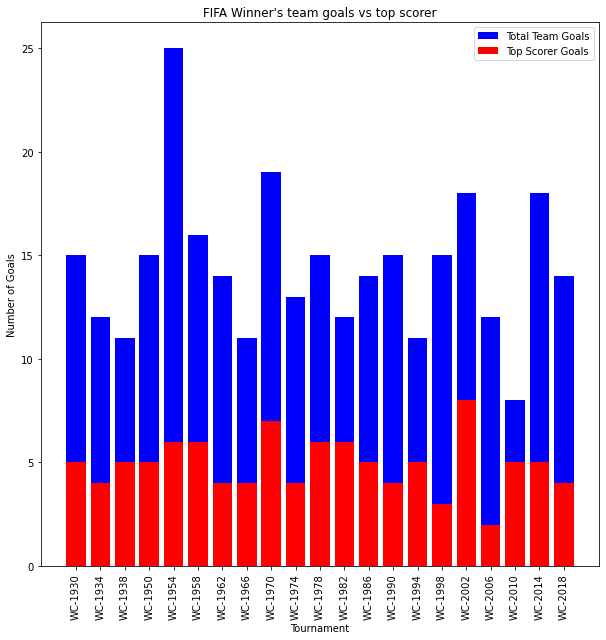

In [82]:
#bar chart
plt.figure(figsize=(10,10))
plt.bar(tournament , winner_total_goals, color="b", label = "Total Team Goals")
plt.bar(tournament , top_scorer_goals, color="r", label="Top Scorer Goals")
plt.xlabel('Tournament')
plt.ylabel('Number of Goals')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title("FIFA Winner's team goals vs top scorer")
plt.show()

In [83]:
#get data for npnwinner - top scorer and total goals
tournament = non_winner_single_player_goals['tournament_id'].values
nonwinner_total_goals = non_winner_single_player_goals['total_team_goals']
ntop_scorer_goals=non_winner_single_player_goals['Goals scored by single player(max)']

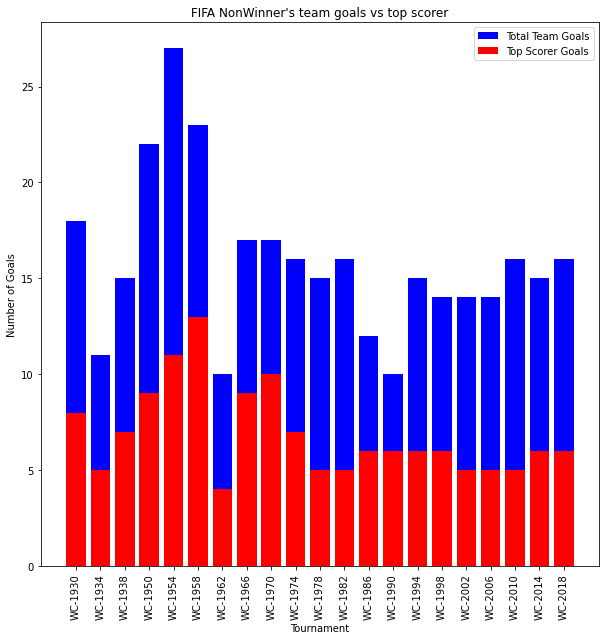

In [84]:
#bar chart
plt.figure(figsize=(10,10))
plt.bar(tournament , nonwinner_total_goals, color="b", label = "Total Team Goals")
plt.bar(tournament , ntop_scorer_goals, color="r", label="Top Scorer Goals")
plt.xlabel('Tournament')
plt.ylabel('Number of Goals')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title("FIFA NonWinner's team goals vs top scorer")
plt.show()

<AxesSubplot:title={'center':'Average Top Scorer Goals vs Total Team Goals For Non Winning Teams'}, ylabel='Total Goals'>

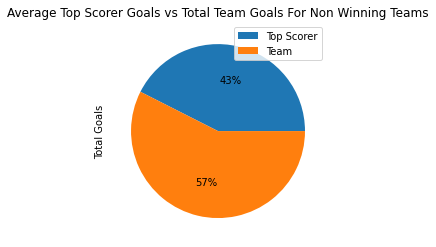

In [85]:
tot_nonwinner_total_goals = non_winner_single_player_goals['total_team_goals'].sum()
tot_ntop_scorer_goals=non_winner_single_player_goals['Goals scored by single player(max)'].sum()
nw_act_team = tot_nonwinner_total_goals - tot_ntop_scorer_goals
labels = "Top Scorer", "Team"
nwpie_data=pd.DataFrame({'xValues': ['Top Scorer', 'Team'],
                      'Total Goals': [tot_ntop_scorer_goals, nw_act_team]})
nwpie_data.plot(kind='pie', autopct='%1.0f%%',y="Total Goals", title = "Average Top Scorer Goals vs Total Team Goals For Non Winning Teams" ,labeldistance=None,labels = labels)


<AxesSubplot:title={'center':'Top Scorer Goals vs Total Team Goals For Winning Teams'}, ylabel='Total Goals'>

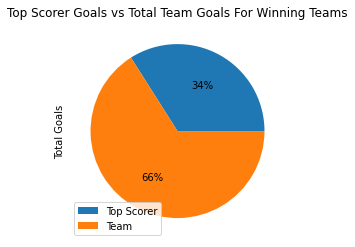

In [86]:

tot_winner_total_goals = winning_team_single_player_goals['total_team_goals'].sum()
tot_top_scorer_goals=winning_team_single_player_goals['Goals scored by single player(max)'].sum()
w_act_team_goals = tot_winner_total_goals - tot_top_scorer_goals

labels = "Top Scorer", "Team"
wpie_data=pd.DataFrame({'xValues': ['Top Scorer', 'Team'],
                      'Total Goals': [ tot_top_scorer_goals, w_act_team_goals]})
wpie_data.plot(kind='pie', autopct='%1.0f%%',y="Total Goals", title = "Top Scorer Goals vs Total Team Goals For Winning Teams" ,labeldistance=None,labels = labels)


In [87]:
from scipy import stats
stats.ttest_ind(w_top_perc, nw_top_perc, equal_var=False)

Ttest_indResult(statistic=-5.886713339306054, pvalue=1.8313860953475158e-06)